# Project-3 Hand Gesture Recognition
Developed By:- 
Bansari Barot,
Bhavik Thummar,
Shubham Mehta,
Pratyush Panda



# Libraries and technologies used:
Keras Sequential Model, cv2, OpenCV, numpy, matplotlib

# Data Set: Sebastien Marcel Static Hand Posture Database

In [1]:
import numpy as np
import matplotlib.pylab as plt

# import keras and its sub-libraries useful for us
import keras
from keras import regularizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import TensorBoard

Using TensorFlow backend.


# Preprocessing of the dataset

In [2]:
# number of images used for calculating gradient
batch_size = 32

# number of loops over the whole training data 
epochs = 15
num_classes = 6

#Image size for resizing
img_size = 60

# input image dimensions
width = img_size
height = img_size

import os
path_A = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\A"
path_B = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\B"
path_C = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\C"
path_Five = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\Five"
path_Point = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\Point"
path_V = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Train\\V"

imlist_A = os.listdir(path_A)
imlist_B = os.listdir(path_B)
imlist_C = os.listdir(path_C)
imlist_Five = os.listdir(path_Five)
imlist_Point = os.listdir(path_Point)
imlist_V = os.listdir(path_V)

In [3]:
from numpy import *
import numpy as np
import cv2
XX = []
yy = []
y = []

for i in imlist_A:
    img = cv2.imread(path_A + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([1, 0, 0, 0, 0, 0])

for i in imlist_B:
    img = cv2.imread(path_B + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([0, 1, 0, 0, 0, 0])
    
for i in imlist_C:
    img = cv2.imread(path_C + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([0, 0, 1, 0, 0, 0])
    
for i in imlist_Five:
    img = cv2.imread(path_Five + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([0, 0, 0, 1, 0, 0])
    
for i in imlist_Point:
    img = cv2.imread(path_Point + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([0, 0, 0, 0, 1, 0])
    
for i in imlist_V:
    img = cv2.imread(path_V + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    name = i.split('-')
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    XX.append(np.array(img_gray))   #append([label, umg]
    y.append(name[0])
    yy.append([0, 0, 0, 0, 0, 1])
    
from sklearn.utils import shuffle
XX,yy,y = shuffle(XX, yy, y, random_state=42)

In [4]:
import os
from numpy import *
import numpy as np
import cv2

path_A_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\A\\uniform"
path_B_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\B\\uniform"
path_C_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\C\\uniform"
path_Five_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\Five\\uniform"
path_Point_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\Point\\uniform"
path_V_test_uniform = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\V\\uniform"

imlist_A_test_uniform = os.listdir(path_A_test_uniform)
imlist_B_test_uniform = os.listdir(path_B_test_uniform)
imlist_C_test_uniform = os.listdir(path_C_test_uniform)
imlist_Five_test_uniform = os.listdir(path_Five_test_uniform)
imlist_Point_test_uniform = os.listdir(path_Point_test_uniform)
imlist_V_test_uniform = os.listdir(path_V_test_uniform)

XX_test_uniform = []
yy_test_uniform = []
y_test_uniform = []
#img_size = 128
'''
1, 0, 0, 0, 0, 0  - A
0, 1, 0, 0, 0, 0-  B
0, 0, 1, 0, 0, 0- C
0, 0, 0, 1, 0, 0- FIVE
0, 0, 0, 0, 1, 0- POINT
0, 0, 0, 0, 0, 1-V
'''
for i in imlist_A_test_uniform:
    img = cv2.imread(path_A_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([1, 0, 0, 0, 0, 0])

for i in imlist_B_test_uniform:
    img = cv2.imread(path_B_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([0, 1, 0, 0, 0, 0])
    
for i in imlist_C_test_uniform:
    img = cv2.imread(path_C_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([0, 0, 1, 0, 0, 0])
    
for i in imlist_Five_test_uniform:
    img = cv2.imread(path_Five_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([0, 0, 0, 1, 0, 0])
    
for i in imlist_Point_test_uniform:
    img = cv2.imread(path_Point_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([0, 0, 0, 0, 1, 0])
    
for i in imlist_V_test_uniform:
    img = cv2.imread(path_V_test_uniform + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    name = i.split('-')
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    XX_test_uniform.append(np.array(img_gray))   #append([label, umg]
    y_test_uniform.append(name[0])
    yy_test_uniform.append([0, 0, 0, 0, 0, 1])
    
XX_test_uniform,yy_test_uniform,y_test_uniform = shuffle(XX_test_uniform, yy_test_uniform, y_test_uniform, random_state=12)
XX_test_uniform = np.array(XX_test_uniform)
yy_test_uniform = np.array(yy_test_uniform)


X_test_uniform = XX_test_uniform.reshape(XX_test_uniform.shape[0], height, width, 1)/255.0

In [5]:
import os
from numpy import *
import numpy as np
import cv2

path_A_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\A\\complex"
path_B_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\B\\complex"
path_C_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\C\\complex"
path_Five_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\Five\\complex"
path_Point_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\Point\\complex"
path_V_test_complex = "C:\\Users\\ppanda\\Desktop\\ML\\project3\\Data\\Marcel-Test\\V\\complex"

imlist_A_test_complex = os.listdir(path_A_test_complex)
imlist_B_test_complex = os.listdir(path_B_test_complex)
imlist_C_test_complex = os.listdir(path_C_test_complex)
imlist_Five_test_complex = os.listdir(path_Five_test_complex)
imlist_Point_test_complex = os.listdir(path_Point_test_complex)
imlist_V_test_complex = os.listdir(path_V_test_complex)

XX_test_complex = []
yy_test_complex = []
y_test_complex = []
#img_size = 128   # comment out when put in real code

'''
1, 0, 0, 0, 0, 0  - A
0, 1, 0, 0, 0, 0-  B
0, 0, 1, 0, 0, 0- C
0, 0, 0, 1, 0, 0- FIVE
0, 0, 0, 0, 1, 0- POINT
0, 0, 0, 0, 0, 1-V
'''
for i in imlist_A_test_complex:
    img = cv2.imread(path_A_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([1, 0, 0, 0, 0, 0])

for i in imlist_B_test_complex:
    img = cv2.imread(path_B_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([0, 1, 0, 0, 0, 0])
    
for i in imlist_C_test_complex:
    img = cv2.imread(path_C_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([0, 0, 1, 0, 0, 0])
    
for i in imlist_Five_test_complex:
    img = cv2.imread(path_Five_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([0, 0, 0, 1, 0, 0])
    
for i in imlist_Point_test_complex:
    img = cv2.imread(path_Point_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    name = i.split('-')
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([0, 0, 0, 0, 1, 0])
    
for i in imlist_V_test_complex:
    img = cv2.imread(path_V_test_complex + '\\' + i)
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    name = i.split('-')
    img_gray = cv2.resize(img_gray,(img_size,img_size))
    XX_test_complex.append(np.array(img_gray))   #append([label, umg]
    y_test_complex.append(name[0])
    yy_test_complex.append([0, 0, 0, 0, 0, 1])
    
XX_test_complex,yy_test_complex,y_test_complex = shuffle(XX_test_complex, yy_test_complex, y_test_complex, random_state=12)
XX_test_complex = np.array(XX_test_complex)
yy_test_complex = np.array(yy_test_complex)

X_test_complex = XX_test_complex.reshape(XX_test_complex.shape[0], height, width, 1)/255.0

In [6]:
from sklearn .model_selection import train_test_split
XX = np.array(XX)
yy = np.array(yy)
X_train,X_test,y_train,y_test = train_test_split(XX,yy,test_size = 0.1, random_state = 42)
# print(X_train[0])

print(len(X_train),len(X_test),len(y_train),len(y_test))
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

x_train = X_train.reshape(X_train.shape[0], height, width, 1)/255.0
x_test = X_test.reshape(X_test.shape[0], height, width, 1)/255.0
print(x_train.shape,x_test.shape)
print(y_train.shape)
# y_train_1hot = keras.utils.to_categorical(y_train, num_classes)
# y_test_1hot = keras.utils.to_categorical(y_test, num_classes)
#print(y_train_1hot[0])
#print(y_train_1hot.shape)

4384 488 4384 488
(4384, 60, 60) (488, 60, 60)
(4384, 6) (488, 6)
(4384, 60, 60, 1) (488, 60, 60, 1)
(4384, 6)


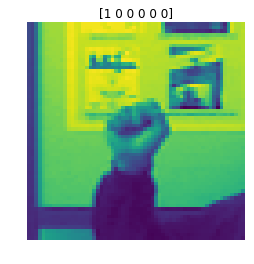

In [7]:
# choose a random image
k = np.random.choice(len(x_train))

# visualize the random chosen image
plt.imshow(x_train[k][:,:,0])
# print the image label/class
plt.title(y_train[k])
plt.axis('off')
plt.show()
# '''
# 1, 0, 0, 0, 0, 0  - A
# 0, 1, 0, 0, 0, 0-  B
# 0, 0, 1, 0, 0, 0- C
# 0, 0, 0, 1, 0, 0- FIVE
# 0, 0, 0, 0, 1, 0- POINT
# 0, 0, 0, 0, 0, 1-V
# '''

# Training the model using Keras Sequential Model

In [8]:
#RIght model
# specify the dimensions of our input
input_shape = (height, width, 1)

# type of the model
model = Sequential()

# first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# maxpooling and faltten for using dense layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# dense layer with a l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# output layer using softmax output
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.005),   # SGD = Stochastic gradient descent optimizer, lr = Learning Rate
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir = './logs', histogram_freq=epochs, batch_size=batch_size, write_graph=True, write_grads=True, 
                          write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None )

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard],
                    validation_data=(x_test, y_test),
                    shuffle = True) # with conv2D layers 64,128,256 epoch 15, batch_size = 32 and dimension = 60 lr = 0.005

Train on 4384 samples, validate on 488 samples
Epoch 1/15
4384/4384 [==============================] - 40s 9ms/step - loss: 1.9251 - acc: 0.3237 - val_loss: 1.8678 - val_acc: 0.4057
Epoch 2/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.7937 - acc: 0.3873 - val_loss: 1.6453 - val_acc: 0.4447
Epoch 3/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.6001 - acc: 0.4820 - val_loss: 1.4262 - val_acc: 0.6475
Epoch 4/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.4141 - acc: 0.5773 - val_loss: 1.2450 - val_acc: 0.7070
Epoch 5/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.2302 - acc: 0.6542 - val_loss: 1.2139 - val_acc: 0.6885
Epoch 6/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.0915 - acc: 0.7096 - val_loss: 1.0595 - val_acc: 0.7152
Epoch 7/15
4384/4384 [==============================] - 39s 9ms/step - loss: 1.0229 - acc: 0.7402 - val_loss: 0.9392 - val_acc: 0.7807
Epoch 8/

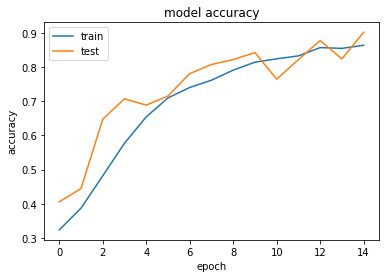

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

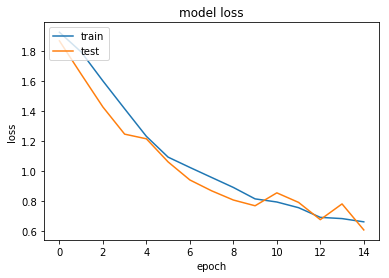

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=1)
print(model.metrics_names)
print(score) # with conv2D layers 64,128,256 epoch 20, batch_size = 32 and dimension = 60 lr = 0.001

382/382 [==============================] - 1s 3ms/step
['loss', 'acc']
[2.4780661984888046, 0.37958115183246072]


In [14]:
score_complex = model.evaluate(X_test_complex, yy_test_complex, verbose=1)
print(score_complex)  # with conv2D layers 64,128,256 epoch 20, batch_size = 32 and dimension = 60 lr = 0.001

277/277 [==============================] - 1s 3ms/step
[3.0343878828661537, 0.32129963947332291]


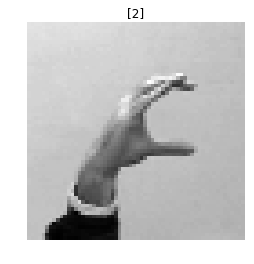

[0 0 1 0 0 0] C


'\n1, 0, 0, 0, 0, 0- A\n0, 1, 0, 0, 0, 0- B\n0, 0, 1, 0, 0, 0- C\n0, 0, 0, 1, 0, 0- FIVE\n0, 0, 0, 0, 1, 0- POINT\n0, 0, 0, 0, 0, 1- V\n'

In [17]:
k = np.random.choice(len(X_test_uniform))

plt.imshow(X_test_uniform[k][:,:,0] , cmap='gray')

image = X_test_uniform[k].reshape(1,height, width, 1)

# our model guess for the label of the image
label = model.predict_classes(image,verbose=False) # verbose give extra detail about how much it takes to calculate and all

plt.title(label)
plt.axis('off')
plt.show()
print(yy_test_uniform[k],y_test_uniform[k])
# '''
# 1, 0, 0, 0, 0, 0- A       - 0
# 0, 1, 0, 0, 0, 0- B       - 1
# 0, 0, 1, 0, 0, 0- C       - 2
# 0, 0, 0, 1, 0, 0- FIVE    - 3
# 0, 0, 0, 0, 1, 0- POINT   - 4
# 0, 0, 0, 0, 0, 1- V       - 5
# '''

In [ ]:
tensorboard --logdir=C:\Users\ppanda\Desktop\ML\project3\logs

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard],
                    validation_data=(x_test, y_test),
                    shuffle = True)# with conv2D layers 16,32,64 epoch 20, batch_size = 32 and dimension = 60 lr = 0.001

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 146s - loss: 1.6387 - acc: 0.3323 - val_loss: 1.5472 - val_acc: 0.4283
Epoch 2/20
4384/4384 [==============================] - 115s - loss: 1.4904 - acc: 0.4140 - val_loss: 1.3700 - val_acc: 0.5020
Epoch 3/20
4384/4384 [==============================] - 112s - loss: 1.3344 - acc: 0.5073 - val_loss: 1.2094 - val_acc: 0.5574
Epoch 4/20
4384/4384 [==============================] - 114s - loss: 1.2049 - acc: 0.5561 - val_loss: 1.0686 - val_acc: 0.6639
Epoch 5/20
4384/4384 [==============================] - 113s - loss: 1.0758 - acc: 0.6109 - val_loss: 0.9805 - val_acc: 0.7111
Epoch 6/20
4384/4384 [==============================] - 112s - loss: 0.9790 - acc: 0.6560 - val_loss: 0.8840 - val_acc: 0.6824
Epoch 7/20
4384/4384 [==============================] - 112s - loss: 0.8903 - acc: 0.7007 - val_loss: 0.7644 - val_acc: 0.7889
Epoch 8/20
4384/4384 [==============================] - 116s - l

# Testing the model on test data

In [12]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=1)
print(model.metrics_names)
print(score) # with conv2D layers 16,32,64 epoch 20, batch_size = 32 and dimension = 60 lr = 0.001

382/382 [==============================] - 5s     
['loss', 'acc']
[2.456546814653886, 0.37696335187757202]


# Training with different parameters

In [11]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard],
                    validation_data=(x_test, y_test),
                    shuffle = True)  # with conv2D layers 64,128,256 epoch 20, batch_size = 32 and dimension = 128 lr = 0.001

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 753s - loss: 2.2075 - acc: 0.3214 - val_loss: 2.1783 - val_acc: 0.3811
Epoch 2/20
4384/4384 [==============================] - 452s - loss: 2.1692 - acc: 0.3515 - val_loss: 2.1623 - val_acc: 0.4037
Epoch 3/20
4384/4384 [==============================] - 461s - loss: 2.1455 - acc: 0.3661 - val_loss: 2.1278 - val_acc: 0.3975
Epoch 4/20
4384/4384 [==============================] - 431s - loss: 2.1121 - acc: 0.3654 - val_loss: 2.0854 - val_acc: 0.4037
Epoch 5/20
4384/4384 [==============================] - 425s - loss: 2.0661 - acc: 0.3789 - val_loss: 2.0280 - val_acc: 0.4139
Epoch 6/20
4384/4384 [==============================] - 422s - loss: 2.0049 - acc: 0.4053 - val_loss: 1.9565 - val_acc: 0.4262
Epoch 7/20
4384/4384 [==============================] - 425s - loss: 1.9307 - acc: 0.4455 - val_loss: 1.8745 - val_acc: 0.4980
Epoch 8/20
4384/4384 [==============================] - 422s - l

In [12]:
print(history.history.keys())  

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


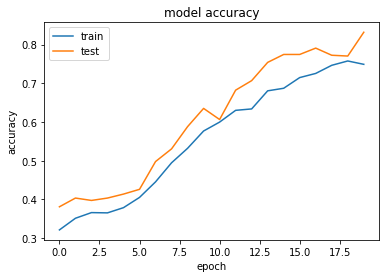

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

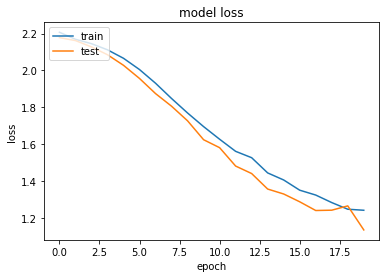

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=1)
print(model.metrics_names)
print(score)  # with conv2D layers 64,128,256 epoch 20, batch_size = 32 and dimension = 128 lr = 0.001

382/382 [==============================] - 13s    
['loss', 'acc']
[2.6878142681421409, 0.36649214768909033]


In [16]:
score_complex = model.evaluate(X_test_complex, yy_test_complex, verbose=1)
print(score_complex)  # with conv2D layers 64,128,256 epoch 20, batch_size = 32 and dimension = 128 lr = 0.001

277/277 [==============================] - 9s     
[3.1932628387148201, 0.29241877288594575]


In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard],
                    validation_data=(x_test, y_test),
                    shuffle = True) # with epoch 20, batch_size = 32 and dimension = 128 lr = 0.001 conv2D layers 32,64,128 
# started at 11:15 AM and finished at 3:00 pm

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 884s - loss: 1.9321 - acc: 0.3143 - val_loss: 1.8995 - val_acc: 0.3811
Epoch 2/20
4384/4384 [==============================] - 614s - loss: 1.8723 - acc: 0.3606 - val_loss: 1.8201 - val_acc: 0.3996
Epoch 3/20
4384/4384 [==============================] - 625s - loss: 1.7798 - acc: 0.4069 - val_loss: 1.6964 - val_acc: 0.4406
Epoch 4/20
4384/4384 [==============================] - 606s - loss: 1.6440 - acc: 0.4683 - val_loss: 1.5649 - val_acc: 0.5840
Epoch 5/20
4384/4384 [==============================] - 849s - loss: 1.5173 - acc: 0.5297 - val_loss: 1.3906 - val_acc: 0.6004
Epoch 6/20
4384/4384 [==============================] - 615s - loss: 1.3928 - acc: 0.5862 - val_loss: 1.2804 - val_acc: 0.6824
Epoch 7/20
4384/4384 [==============================] - 636s - loss: 1.2883 - acc: 0.6289 - val_loss: 1.2333 - val_acc: 0.6332
Epoch 8/20
4384/4384 [==============================] - 611s - l

In [11]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


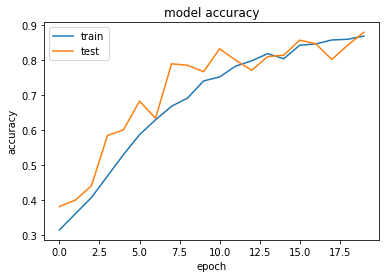

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

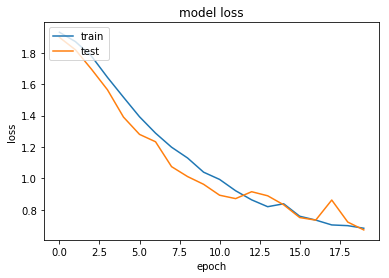

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=1)
print(model.metrics_names)
print(score) # with epoch 20, batch_size = 32 and dimension = 128 and uniform test result lr = 0.001 layers 32,64,128

382/382 [==============================] - 15s    
['loss', 'acc']
[2.670275553358787, 0.36910994772199562]


In [15]:
score_complex = model.evaluate(X_test_complex, yy_test_complex, verbose=1)
print(score_complex) # with epoch 20, batch_size = 32 and dimension = 128 and uniform test result lr = 0.001 layers 32,64,128

277/277 [==============================] - 12s    
[3.2786507150326396, 0.31046931461737043]


In [ ]:
tensorboard --logdir=foo:C:\Users\USER\Documents\MS\WinterQuarter_2018\ML\p_3\logs

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)) # with epoch 20, batch_size = 64 and dimension = 128 lr = 0.001

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 569s - loss: 1.9371 - acc: 0.3109 - val_loss: 1.9094 - val_acc: 0.2848
Epoch 2/20
4384/4384 [==============================] - 540s - loss: 1.8911 - acc: 0.3508 - val_loss: 1.8609 - val_acc: 0.3566
Epoch 3/20
4384/4384 [==============================] - 541s - loss: 1.8393 - acc: 0.3652 - val_loss: 1.8075 - val_acc: 0.4590
Epoch 4/20
4384/4384 [==============================] - 552s - loss: 1.7759 - acc: 0.3932 - val_loss: 1.7132 - val_acc: 0.4529
Epoch 5/20
4384/4384 [==============================] - 587s - loss: 1.6976 - acc: 0.4368 - val_loss: 1.6204 - val_acc: 0.4836
Epoch 6/20
4384/4384 [==============================] - 605s - loss: 1.6096 - acc: 0.4941 - val_loss: 1.5474 - val_acc: 0.5000
Epoch 7/20
4384/4384 [==============================] - 578s - loss: 1.5328 - acc: 0.5310 - val_loss: 1.5009 - val_acc: 0.5656
Epoch 8/20
4384/4384 [==============================] - 589s - l

In [18]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


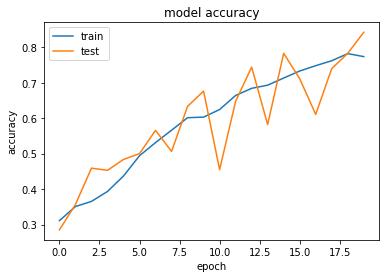

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

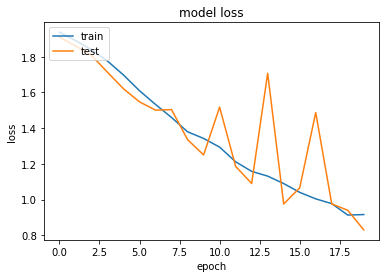

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=1)
print(model.metrics_names)
print(score) # with epoch 20, batch_size = 64 and dimension = 128 and uniform test result lr = 0.001

382/382 [==============================] - 15s    
['loss', 'acc']
[2.5693013318546156, 0.33769633601473265]


In [22]:
score_complex = model.evaluate(X_test_complex, yy_test_complex, verbose=1)
print(score_complex) # with epoch 20, batch_size = 64 and dimension = 128 and uniform test result lr = 0.001

277/277 [==============================] - 12s    
[2.9961092738898651, 0.28519855627944751]


In [42]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)) # with epoch 20, batch_size = 64 and dimension = 128 lr = 0.005

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 749s - loss: 1.9010 - acc: 0.3385 - val_loss: 1.9257 - val_acc: 0.2766
Epoch 2/20
4384/4384 [==============================] - 683s - loss: 1.7460 - acc: 0.4031 - val_loss: 1.6189 - val_acc: 0.4816
Epoch 3/20
4384/4384 [==============================] - 758s - loss: 1.5801 - acc: 0.4911 - val_loss: 1.5582 - val_acc: 0.5594
Epoch 4/20
4384/4384 [==============================] - 746s - loss: 1.4275 - acc: 0.5639 - val_loss: 1.3172 - val_acc: 0.6762
Epoch 5/20
4384/4384 [==============================] - 733s - loss: 1.2766 - acc: 0.6286 - val_loss: 1.1269 - val_acc: 0.7275
Epoch 6/20
4384/4384 [==============================] - 709s - loss: 1.1704 - acc: 0.6811 - val_loss: 1.0002 - val_acc: 0.7602
Epoch 7/20
4384/4384 [==============================] - 793s - loss: 1.0729 - acc: 0.7101 - val_loss: 1.2419 - val_acc: 0.6045
Epoch 8/20
4384/4384 [==============================] - 755s - l

In [44]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


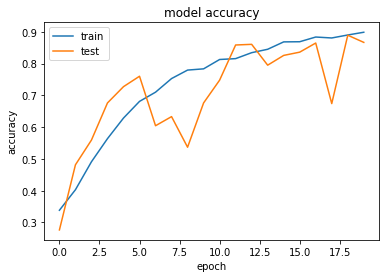

In [46]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

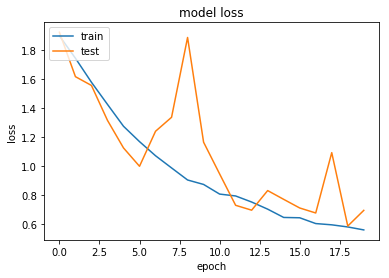

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
score = model.evaluate(X_test_uniform, yy_test_uniform, verbose=0)

In [51]:
model.metrics_names

['loss', 'acc']

In [52]:
print(score) # with epoch 20, batch_size = 64 and dimension = 128 and uniform test result

[2.4962780263411437, 0.33507853465554605]


In [56]:
score_complex = model.evaluate(X_test_complex, yy_test_complex, verbose=1)

277/277 [==============================] - 12s    


In [57]:
model.metrics_names

['loss', 'acc']

In [58]:
print(score_complex) # with epoch 20, batch_size = 64 and dimension = 128 and complex test result

[3.3228042323666789, 0.31768953143904788]


# Training model - max accuracy we got so far

In [8]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))          # with epoch 20, batch_size = 64 and dimension = 128

Train on 4384 samples, validate on 488 samples
Epoch 1/20
4384/4384 [==============================] - 587s - loss: 1.8772 - acc: 0.3339 - val_loss: 1.8195 - val_acc: 0.3402
Epoch 2/20
4384/4384 [==============================] - 559s - loss: 1.7023 - acc: 0.4309 - val_loss: 1.6072 - val_acc: 0.4385
Epoch 3/20
4384/4384 [==============================] - 552s - loss: 1.5349 - acc: 0.5109 - val_loss: 1.5294 - val_acc: 0.4221
Epoch 4/20
4384/4384 [==============================] - 558s - loss: 1.3793 - acc: 0.5858 - val_loss: 1.1657 - val_acc: 0.7336
Epoch 5/20
4384/4384 [==============================] - 554s - loss: 1.2629 - acc: 0.6478 - val_loss: 1.3184 - val_acc: 0.6045
Epoch 6/20
4384/4384 [==============================] - 541s - loss: 1.1505 - acc: 0.6807 - val_loss: 1.0695 - val_acc: 0.7541
Epoch 7/20
4384/4384 [==============================] - 531s - loss: 1.0335 - acc: 0.7208 - val_loss: 0.9760 - val_acc: 0.7930
Epoch 8/20
4384/4384 [==============================] - 529s - l

In [28]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))           # with epoch 10 and batch_size = 128 and dimension = 50

Train on 4384 samples, validate on 488 samples
Epoch 1/10
4384/4384 [==============================] - 81s - loss: 1.9578 - acc: 0.2979 - val_loss: 1.9264 - val_acc: 0.3545
Epoch 2/10
4384/4384 [==============================] - 75s - loss: 1.9248 - acc: 0.3287 - val_loss: 1.9067 - val_acc: 0.3545
Epoch 3/10
4384/4384 [==============================] - 70s - loss: 1.9059 - acc: 0.3538 - val_loss: 1.8849 - val_acc: 0.3893
Epoch 4/10
4384/4384 [==============================] - 69s - loss: 1.8810 - acc: 0.3602 - val_loss: 1.8625 - val_acc: 0.3709
Epoch 5/10
4384/4384 [==============================] - 72s - loss: 1.8477 - acc: 0.3620 - val_loss: 1.8083 - val_acc: 0.3627
Epoch 6/10
4384/4384 [==============================] - 71s - loss: 1.8017 - acc: 0.3848 - val_loss: 1.7549 - val_acc: 0.4242
Epoch 7/10
4384/4384 [==============================] - 70s - loss: 1.7439 - acc: 0.4053 - val_loss: 1.7036 - val_acc: 0.4242
Epoch 8/10
4384/4384 [==============================] - 86s - loss: 1.6

# Testing - 37.958% accuracy

In [14]:
print(score)  # with epoch 20, batch_size = 64 and dimension = 128

[2.6271576020105969, 0.37958115191047731]


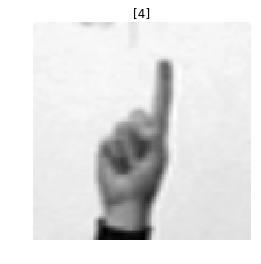

[0 0 0 0 1 0] Point


In [26]:
k = np.random.choice(len(X_test_uniform))

plt.imshow(X_test_uniform[k][:,:,0] , cmap='gray')

image = X_test_uniform[k].reshape(1,height, width, 1)

# our model guess for the label of the image
label = model.predict_classes(image,verbose=False) # verbose give extra detail about how much it takes to calculate and all

plt.title(label)
plt.axis('off')
plt.show()
print(yy_test_uniform[k],y_test_uniform[k])

In [31]:
keras.callbacks.Callback()

In [43]:
keras.callbacks.History()

In [45]:
history